In [2]:
#The user may change this section if they prefer other IDE like VS code,...
#Here I am using the google colab and I am connecting to the google Drive where the simulation.py and Glassform.so are located
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab_Notebooks/Git_versions')
import sys
import os

# Set the working directory
os.chdir('/content/drive/My Drive/Colab_Notebooks/Git_versions')

# test
#if anything is wrong(missing files, not connecting to Drive,..) we shall see the error after running this import
from simulator import GlassformSimulator

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Machine Degrees and Seconds Conversion**

This section describes how machine degrees and seconds are related in the simulation system. To simpilify, we assume that the cycle length is 13.36.

---

### **1. Relationship Between Machine Degrees and Seconds**
In this simulation:
- A total cycle of **13.36 seconds** corresponds to **360 machine degrees**.

#### Conversion Formulas:
1. **Degrees to Seconds**:
   $$
   \text{Time (s)} = \frac{\text{Degrees}}{360} \times 13.36
   $$
2. **Seconds to Degrees**:
   $$
   \text{Degrees} = \frac{\text{Time (s)}}{13.36} \times 360
   $$

---

### **2. Example Calculations**
For a nominal **contact time** of $ t_{\text{contact}} = 106^\circ $:
$$
\text{Time (s)} = \frac{106}{360} \times 13.36 = 3.93 \, \text{s}
$$

For a nominal **cooling time** of $ t_{\text{cooling}} = 120^\circ $:
$$
\text{Time (s)} = \frac{120}{360} \times 13.36 = 4.45 \, \text{s}
$$

---



### **4.Contact Parameter in Machine Degrees**

The **contact** parameter is the sum of $t_{\text{settle}} $ and $ t_{\text{counter}} $, weighted as follows:
$$
t_{\text{contact}} = 0.6 \cdot t_{\text{settle}} + 0.4 \cdot t_{\text{counter}}
$$

Where:
- $ t_{\text{settle}} $ is the settling time in machine degrees.
- $ t_{\text{counter}} $ is the counter time in machine degrees.

For example, with $ t_{\text{contact}} = 106^\circ $:
- $ t_{\text{settle}} = 0.6 \cdot 106 = 63.6^\circ $
- $ t_{\text{counter}} = 0.4 \cdot 106 = 42.4^\circ $

This simplifies the simulation by controlling $ t_{\text{contact}} $  and $ t_{\text{cooling}} $, while dynamically deriving $ t_{\text{settle}} $ and $ t_{\text{counter}} $.

---


### **4 Adjustment for Contact and Cooling**

In the simulation, both $ t_{\text{contact}} $ and $ t_{\text{cooling}} $ can be varied by $ \pm 5\% $ of their nominal values. This allows for fine-tuning during control.

#### Adjustment Formula:
1. Increased value:
   $$
   \text{Adjusted Value} = \text{Nominal Value} \times (1 + 0.05)
   $$

2. Decreased value:
   $$
   \text{Adjusted Value} = \text{Nominal Value} \times (1 - 0.05)
   $$

For example:
- If $ t_{\text{contact}} = 106^\circ $, the range is:
  $$
  [106 \times 0.95, \, 106 \times 1.05] = [100.7^\circ, \, 111.3^\circ]
  $$
- If $ t_{\text{cooling}} = 120^\circ $, the range is:
  $$
  [120 \times 0.95, \, 120 \times 1.05] = [114^\circ, \, 126^\circ]
  $$

This adjustment range ensures flexibility in the simulation while maintaining control over the parameters.

---
### **5. Practical Usage**
- The simulator internally operates with timings in **seconds**.
- Parameters such as $ t_{\text{contact}}, t_{\text{settle}}, t_{\text{counter}}, \text{and } t_{\text{cooling}} $ are provided and reported in **machine degrees** for easier interpretation.

This conversion ensures consistency between the inputs/outputs of the simulator and the analysis results.

---



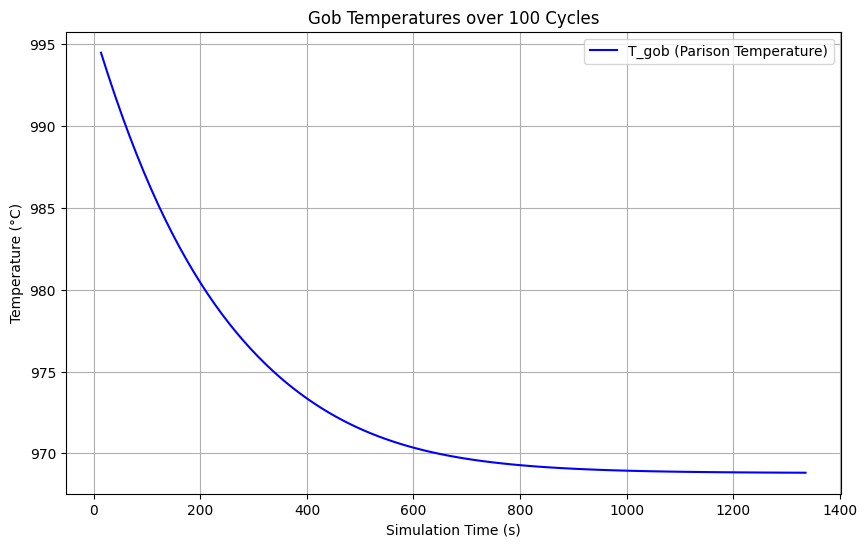

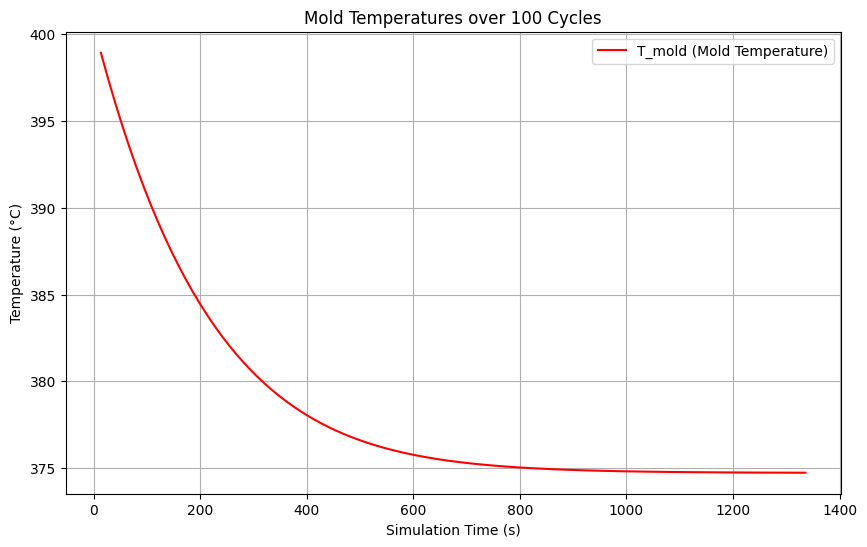

Results have been saved in the CSV file at: /content/simulation_log.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Time:        13.36, T_mold: 398.94, T_parison: 994.5


In [5]:
import csv
import matplotlib.pyplot as plt
from simulator import GlassformSimulator  # Ensure simulator.py is in the current directory
from google.colab import files  # Only needed in Google Colab for downloading files

# Constants
CYCLE_LENGTH_S = 13.36  # Total cycle length in seconds Parametric subject to change
CONTACT_NOMINAL_DEG = 106
COOLING_NOMINAL_DEG = 120
PROPORTION_SETTLE = 0.6
PROPORTION_COUNTER = 0.4

# Conversion functions
def degrees_to_seconds(degrees):
    """Convert machine degrees to seconds."""
    return (degrees / 360) * CYCLE_LENGTH_S

def seconds_to_degrees(time_s):
    """Convert seconds to machine degrees."""
    return (time_s / CYCLE_LENGTH_S) * 360

# Initialize the simulator
simulator = GlassformSimulator()

# Reset and set initial conditions
contact_deg = CONTACT_NOMINAL_DEG  # Nominal contact time in degrees
cooling_deg = COOLING_NOMINAL_DEG  # Nominal cooling time in degrees

# Convert to seconds for the simulator
t_settle_s = degrees_to_seconds(PROPORTION_SETTLE * contact_deg)
t_counter_s = degrees_to_seconds(PROPORTION_COUNTER * contact_deg)
t_cooling_s = degrees_to_seconds(cooling_deg)

# Set initial simulator parameters
simulator.reset(T_mold=400.5)
simulator.T_gob = 1100
simulator.T_air = 50
simulator.t_cycle = CYCLE_LENGTH_S
simulator.t_settle = t_settle_s
simulator.t_counter = t_counter_s
simulator.t_cooling = t_cooling_s

# Lists to store the temperatures at each cycle
gob_temps = []
mold_temps = []
time_steps = []

# File path for saving the CSV
file_path = '/content/simulation_log.csv'

# Open the CSV file to log the data
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow([
        'Time (s)', 'T_gob (Parison Temperature)', 'T_mold (Mold Temperature)',
        'Contact Time (°)', 't_settle (°)', 't_counter (°)', 't_cooling (°)'
    ])

    # Run the simulation for 100 cycles
    for i in range(100):
        simulator.simulate_cycle()  # Run one cycle in the simulation

        # Collect temperatures
        gob_temp = simulator.T_parison
        mold_temp = simulator.T_mold
        time_step = simulator.time

        # Convert parameters back to degrees for logging
        t_settle_deg = seconds_to_degrees(simulator.t_settle)
        t_counter_deg = seconds_to_degrees(simulator.t_counter)
        t_cooling_deg = seconds_to_degrees(simulator.t_cooling)
        contact_deg = t_settle_deg + t_counter_deg

        # Write to CSV
        writer.writerow([
            time_step, gob_temp, mold_temp,
            contact_deg, t_settle_deg, t_counter_deg, t_cooling_deg
        ])

        # Append the results to lists for plotting
        gob_temps.append(gob_temp)
        mold_temps.append(mold_temp)
        time_steps.append(time_step)

# Plot the temperatures after the simulation
plt.figure(figsize=(10, 6))
plt.plot(time_steps, gob_temps, label='T_gob (Parison Temperature)', color='blue')
plt.xlabel('Simulation Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Gob Temperatures over 100 Cycles')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_steps, mold_temps, label='T_mold (Mold Temperature)', color='red')
plt.xlabel('Simulation Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Mold Temperatures over 100 Cycles')
plt.legend()
plt.grid(True)
plt.show()

# Print confirmation of results saved
print(f"Results have been saved in the CSV file at: {file_path}")

# Download the file (if in Colab)
files.download(file_path)

# Reset simulator for further use
simulator.reset()
simulator.simulate_cycle()

print(f"Time: {simulator.time:12.2f}, T_mold: {simulator.T_mold:.2f}, "
      f"T_parison: {simulator.T_parison:.1f}")


# **Steady State and Control Parameter Sensitivity**

### **1. Steady State**
The simulation runs for several cycles (e.g., 100), and the system reaches a **steady state** when the parison temperature stabilizes within a threshold of:
$$
\Delta T_{\text{parison}} \leq 0.1^\circ
$$
for at least 10 consecutive cycles.

---

# **2. Choosing the Moving Average Window**

### **1. Effect of the Moving Average**
In this simulation, a **moving average** is used to detect the steady state by smoothing out fluctuations in the parison temperature. The window size ($N$) determines how many cycles are considered when calculating the average.

- A smaller $N$ results in a more responsive moving average, but it may still capture noise or short-term fluctuations.
- A larger $N$ provides a smoother trend, but it may delay steady-state detection.

---

### **2. Example from the Simulation**
From the figure:
- A moving average window of $N = 50$ cycles provides a balance between:
  - Capturing long-term stability.
  - Avoiding noise or transient fluctuations.
- The parison temperature stabilizes around $970^\circ \text{C}$, and the moving average converges to the same value near the steady-state cycle.

---

### **3. Practical Guidance**
- In this example, the steady state was reached at approximately **cycle 1400**, using $N = 50$.
- Larger values of $N$ (e.g., 100) could smooth the trend further but delay detection.
- Smaller values of $N$ (e.g., 10) could react faster but may not reflect long-term stability.

---

### **Formula Recap**
The moving average is calculated as:
$$
\text{MA}(t) = \frac{1}{N} \sum_{i=t-N+1}^{t} T_{\text{parison}}(i)
$$
Where:
- $T_{\text{parison}}(i)$ is the parison temperature at cycle $i$.
- $N$ is the size of the moving average window (e.g., 50 cycles in this example).

Steady state reached at cycle 108


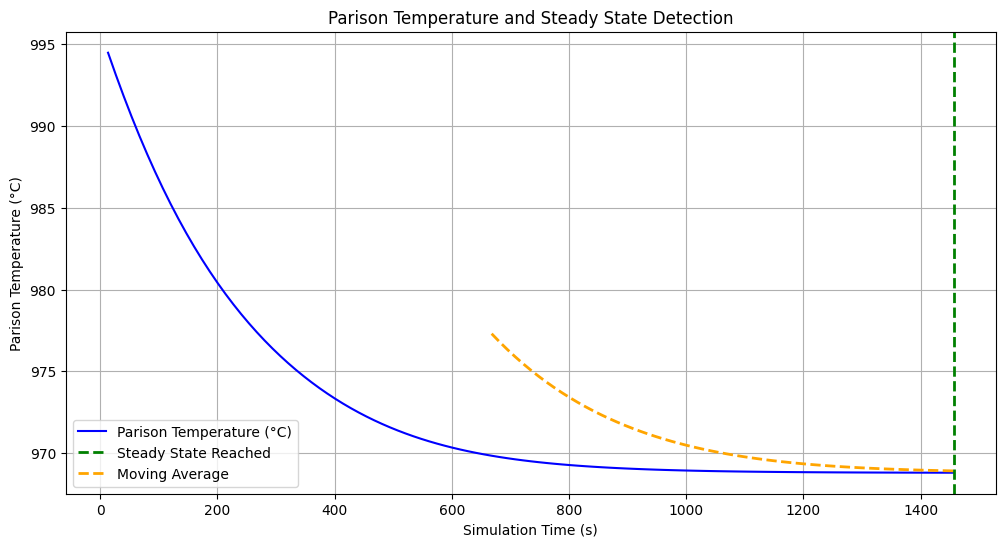

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for steady-state detection
steady_window = 50  # Number of cycles to consider for moving average/slope
slope_threshold = 0.01  # Threshold for steady state slope

# Placeholder for results
gob_temps = []  # Parison temperature (T_gob)
mold_temps = []  # Mold temperature (T_mold)
time_steps = []  # Simulation time
steady_cycle = None


# Initialize the simulator
# Initialize the simulator
simulator.reset(T_mold=400.5)
simulator.T_gob = 1100
simulator.T_air = 50
simulator.t_settle = degrees_to_seconds(0.6 * CONTACT_NOMINAL_DEG)  # Replace with correct constant
simulator.t_counter = degrees_to_seconds(0.4 * CONTACT_NOMINAL_DEG)  # Replace with correct constant
simulator.t_cooling = degrees_to_seconds(COOLING_NOMINAL_DEG)  # Replace with correct constant


# Run simulation to detect steady state
for i in range(1000):  # Simulate for up to 1000 cycles
    simulator.simulate_cycle()
    gob_temp = simulator.T_parison
    mold_temp = simulator.T_mold
    time_step = simulator.time

    # Store results
    gob_temps.append(gob_temp)
    mold_temps.append(mold_temp)
    time_steps.append(time_step)

    # Check steady state only after enough cycles for the window
    if i >= steady_window:
        recent_temps = gob_temps[-steady_window:]  # Last `steady_window` cycles
        # Calculate slope of recent temperatures
        slope = (recent_temps[-1] - recent_temps[0]) / steady_window

        # Check if the slope is within the threshold
        if abs(slope) <= slope_threshold:
            steady_cycle = i
            print(f"Steady state reached at cycle {steady_cycle}")
            break

if steady_cycle is None:
    print("Steady state not reached within the simulation time.")

# Compute moving average for visualization
moving_avg = np.convolve(gob_temps, np.ones(steady_window) / steady_window, mode="valid")
avg_start_idx = steady_window - 1  # Start index for moving average

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(time_steps, gob_temps, label="Parison Temperature (°C)", color="blue")
if steady_cycle is not None:
    plt.axvline(x=time_steps[steady_cycle], color="green", linestyle="--", linewidth=2, label="Steady State Reached")
plt.plot(time_steps[avg_start_idx:], moving_avg, color="orange", linestyle="--", linewidth=2, label="Moving Average")
plt.xlabel("Simulation Time (s)")
plt.ylabel("Parison Temperature (°C)")  # Properly labeled
plt.title("Parison Temperature and Steady State Detection")
plt.legend()
plt.grid(True)
plt.show()
